In [1]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("IUBAT_Testing7.csv")
df.head()

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,Female,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
1,Male,18-25,2,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
2,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
3,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
4,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Slightly Cool,Very Good


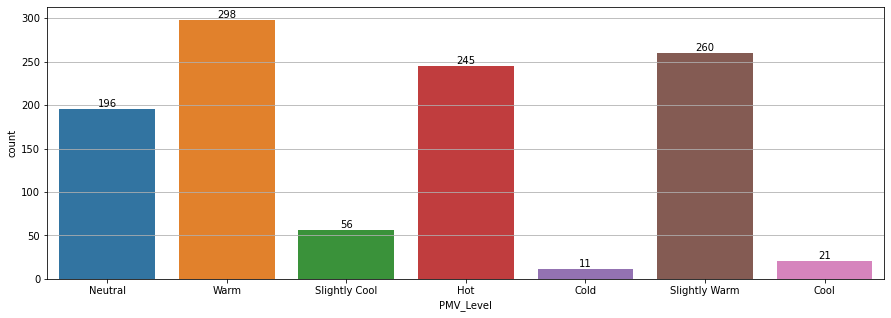

In [3]:
# Adding Values to Seaborn Count Plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='PMV_Level', )

for label in ax.containers:
    ax.bar_label(label)
    
plt.show()


In [4]:
df['PMV_Level'].value_counts()

Warm             298
Slightly Warm    260
Hot              245
Neutral          196
Slightly Cool     56
Cool              21
Cold              11
Name: PMV_Level, dtype: int64

In [5]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

Male      663
Female    424
Name: Gender, dtype: int64
18-25    1009
26-30      78
Name: Age, dtype: int64
3    565
2    423
4     99
Name: Study_Level, dtype: int64
601     52
902     48
607     47
801     44
501     44
620     44
621     43
707     42
612     41
608     40
603     40
903     38
504     38
904     37
804     37
924     35
520     34
901     34
1003    34
604     33
803     30
905     29
1004    29
913     29
802     28
805     27
823     26
907     24
908     21
909     21
1002    18
Name: Room_No, dtype: int64
N-W    459
S-E    445
S-W    125
N-E     58
Name: Room_Orientation, dtype: int64
24    202
26    182
25    165
23    134
21    112
18     74
28     44
15     42
16     41
22     37
13     33
10     21
Name: No_Lights, dtype: int64
12    221
9     187
14    162
10    133
13    132
5      66
15     44
8      44
11     41
6      29
16     28
Name: No_Fans, dtype: int64
3    573
5    288
4    147
2     79
Name: No_Windows, dtype: int64
2    789
1    298
Name: No_Do

<AxesSubplot:>

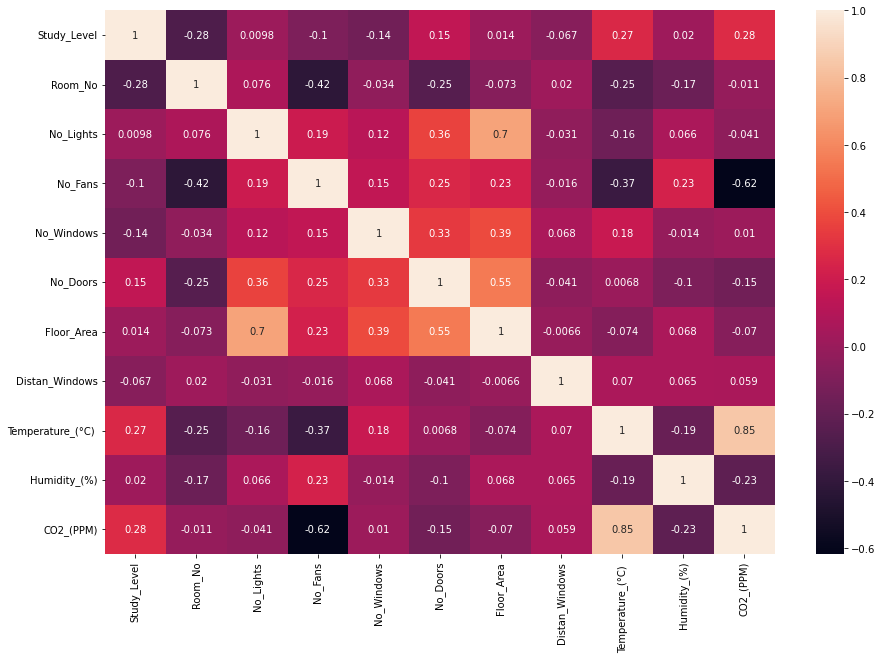

In [6]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [8]:
df.head()  

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2,1


In [9]:
#Filter any variables with low variance (close to zero) to avoid overfitting
df.var()

Gender                  0.238133
Age                     0.066669
Study_Level             0.391737
Room_No             25085.079254
Room_Orientation        0.711123
No_Lights              15.831979
No_Fans                 7.346655
No_Windows              0.917549
No_Doors                0.199175
Floor_Area            363.316001
Distan_Windows          1.924690
Temperature_(°C)        2.851991
Humidity_(%)           29.145839
CO2_(PPM)              15.096677
PMV_Level               3.561772
Lighting_Level          3.038354
dtype: float64

In [10]:
inputs = df.drop(['PMV_Level',], axis=1)

In [11]:
target = df['PMV_Level']

In [12]:
inputs

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0,0,3,504,0,21,12,5,2,320,3,30,63,447,0
1083,0,0,3,504,0,21,12,5,2,320,3,30,63,447,2
1084,1,0,3,504,0,21,12,5,2,320,2,30,63,447,3
1085,1,0,3,504,0,21,12,5,2,320,2,30,63,447,5


In [13]:
target

0       0
1       0
2       1
3       1
4       2
       ..
1082    3
1083    3
1084    0
1085    3
1086    0
Name: PMV_Level, Length: 1087, dtype: uint8

In [14]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [15]:
df['PMV_Level'].value_counts()

1    298
5    260
3    245
0    196
2     56
6     21
4     11
Name: PMV_Level, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [17]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN

In [18]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [19]:
y.value_counts()

1    298
2    298
3    298
4    298
5    298
6    298
0    284
Name: PMV_Level, dtype: int64

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =42) # 75 - 25 split   (test_size=0.20)

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameters
param_grid = {
    "criterion":("gini", "entropy"), 
    "max_depth":(list(range(1, 17))), 
    "min_samples_split":[2, 3, 4, 6, 8], 
    "min_samples_leaf":list(range(1, 15)), 
}
# training model on the define params with GridSearchCV
rfc_tree = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc_tree, param_grid,scoring="accuracy",
                       n_jobs=-1,verbose=1, cv=5)

rfc_cv.fit(X_train, y_train)
predictions = rfc_cv.predict(X_test)
optimal_params = rfc_cv.best_params_
print(f"\nOptimal paramters: ({optimal_params})")

print("\n====BEST MODEL SCORE====")
print('Best model score: ', rfc_cv.best_score_)

Fitting 5 folds for each of 2240 candidates, totalling 11200 fits


In [26]:
rfc = RandomForestClassifier(criterion='gini',max_depth=20,n_estimators=1000,max_features='sqrt')

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=1000)

In [28]:
rfc.score(X_train, y_train)

0.8526383526383526

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

y_predict = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_predict))

Accuracy score: 0.6138996138996139


In [30]:
y_predict = rfc.predict(X_test)

In [31]:
y_predict = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 4.22
RMSE: 2.06


In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
print("Confusion matrix:")
print(cm)


Accuracy: 0.6138996138996139
Confusion matrix:
[[21 13 11  8  0 16  2]
 [ 4 30  2 22  1 14  8]
 [ 2  6 54  0  3  1  3]
 [ 6 10  1 53  0  8  0]
 [ 0  1  0  1 76  0  0]
 [10 25  4  7  0 26  2]
 [ 2  0  2  0  5  0 58]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.47      0.30      0.36        71
           1       0.35      0.37      0.36        81
           2       0.73      0.78      0.76        69
           3       0.58      0.68      0.63        78
           4       0.89      0.97      0.93        78
           5       0.40      0.35      0.37        74
           6       0.79      0.87      0.83        67

    accuracy                           0.61       518
   macro avg       0.60      0.62      0.61       518
weighted avg       0.60      0.61      0.60       518



In [35]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [36]:
y_predict = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

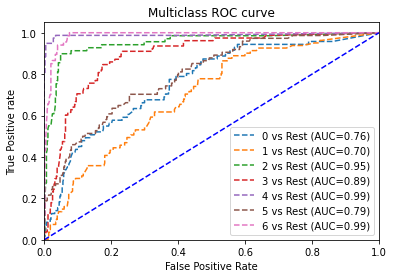

In [37]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [38]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, rfc.predict_proba(X_test))
logloss

1.811165276480228

Text(0.5, 1.0, 'Random Forest Feature Importances (MDI)')

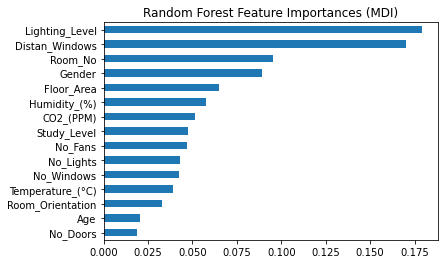

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('Random Forest Feature Importances (MDI)')

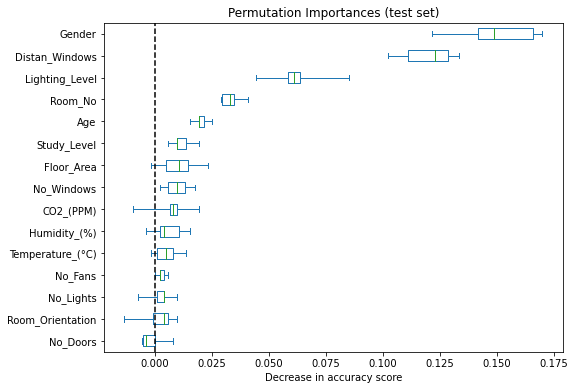

<Figure size 1800x1080 with 0 Axes>

In [40]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

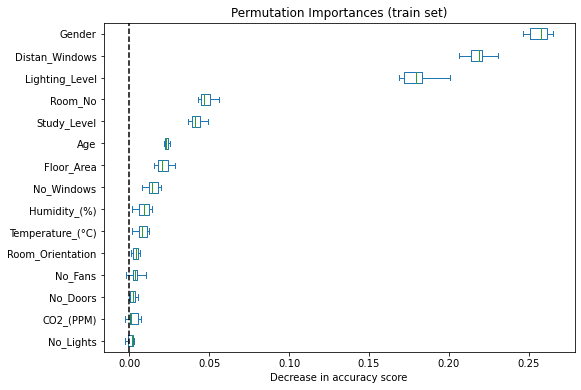

<Figure size 1800x1080 with 0 Axes>

In [41]:
result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [42]:
import numpy as np
import pandas as pd

In [43]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

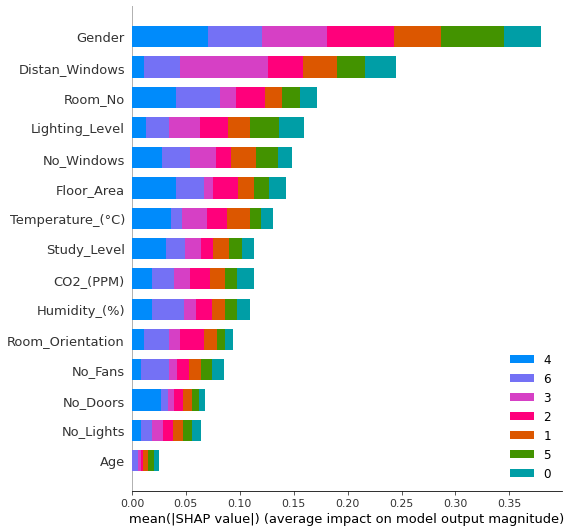

In [44]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=rfc.classes_)

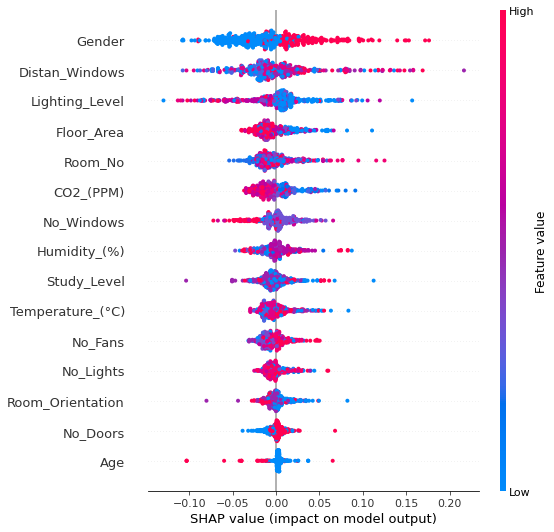

In [45]:
shap.summary_plot(shap_values[0], X_test)

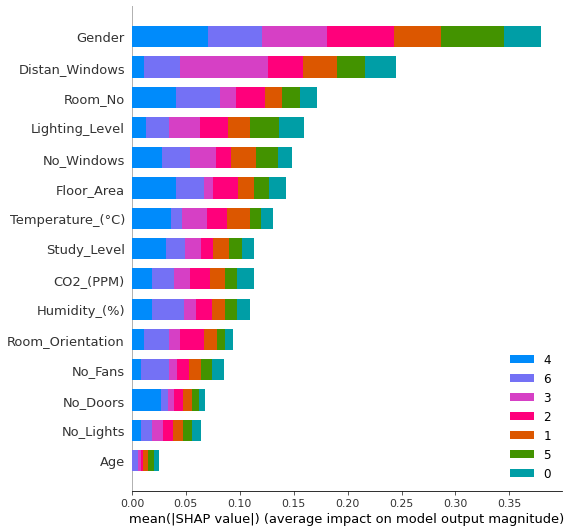

In [46]:
shap.summary_plot(shap_values, X_train, class_names=rfc.classes_ )

In [47]:
#importing random forest classifier and recursive feature elemenation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

scores = []
for i in range(1,X.shape[1]):
    rfc = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select= i)
    rfc.fit(X_train, y_train)

    y_predict = rfc.predict(X_test)
    #printing the number of selected features and its accuracy after each iteration
    print('Number of Selected features: ', i)
    sc = accuracy_score(y_test, y_predict)
    print('accuracy score:', sc)
    print()
    scores.append(sc)

Number of Selected features:  1
accuracy score: 0.41312741312741313

Number of Selected features:  2
accuracy score: 0.4594594594594595

Number of Selected features:  3
accuracy score: 0.4864864864864865

Number of Selected features:  4
accuracy score: 0.5366795366795367

Number of Selected features:  5
accuracy score: 0.5637065637065637

Number of Selected features:  6
accuracy score: 0.5637065637065637

Number of Selected features:  7
accuracy score: 0.5868725868725869

Number of Selected features:  8
accuracy score: 0.5907335907335908

Number of Selected features:  9
accuracy score: 0.5868725868725869

Number of Selected features:  10
accuracy score: 0.5965250965250966

Number of Selected features:  11
accuracy score: 0.5984555984555985

Number of Selected features:  12
accuracy score: 0.6003861003861004

Number of Selected features:  13
accuracy score: 0.6138996138996139

Number of Selected features:  14
accuracy score: 0.6158301158301158



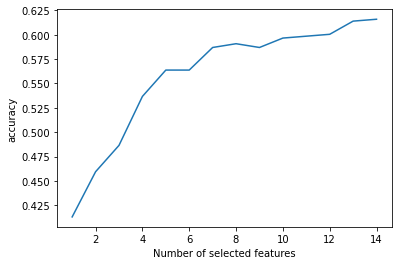

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("accuracy")
plt.plot(
    range(1, 15),
    scores,
)
plt.show()

In [49]:
rfc.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True])

In [50]:
features = X_train.columns[rfc.get_support()]
features

Index(['Gender', 'Age', 'Study_Level', 'Room_No', 'Room_Orientation',
       'No_Lights', 'No_Fans', 'No_Windows', 'Floor_Area', 'Distan_Windows',
       'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'Lighting_Level'],
      dtype='object')

In [51]:
excluded_feature = list(set(X_train.columns) - set(features))
print(excluded_feature)

['No_Doors']


In [52]:
#drop features from X
X = X.drop(['No_Doors'], axis=1)

In [53]:
#updating train & test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(n_estimators=100,)
rfe = RFECV(
    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)
rfe.fit(X_train,y_train)
print(f"Optimal number of features: {rfe.n_features_}")

Optimal number of features: 9


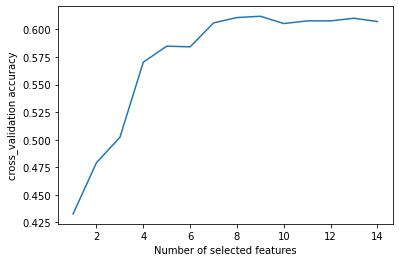

In [55]:
n_scores = len(rfe.cv_results_)
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("cross_validation accuracy")
plt.plot(
    range (1,len (rfe.cv_results_["mean_test_score"])+1),
    rfe.cv_results_["mean_test_score"],)

plt.show()

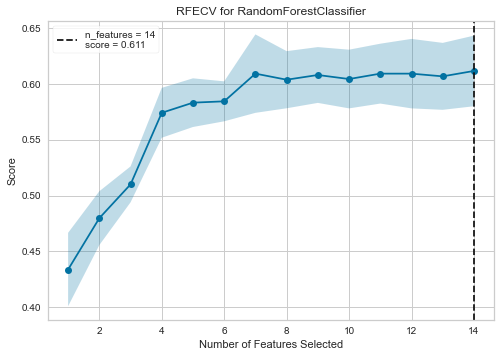

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [56]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear RF classifier
visualizer = RFECV(estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,)

visualizer.fit(X_train,y_train)    # Fit the data to the visualizer
visualizer.show()                  # Finalize and render the figure

#The shaded area represents the variability of cross-validation, 
#one standard deviation above and below the mean accuracy score drawn by the curve.

In [57]:
for depth in [5,6,7,8,10,11,12,13,14,15, 16, 17]:
    rfc = RandomForestClassifier(max_depth=depth)
    rfc.fit(X_train, y_train)
    print(f'Depth: {depth}. Score: {rfc.score(X_train, y_train)}')

Depth: 5. Score: 0.6210018105009053
Depth: 6. Score: 0.6584188292094146
Depth: 7. Score: 0.7229933614966807
Depth: 8. Score: 0.7604103802051901
Depth: 10. Score: 0.8261919130959565
Depth: 11. Score: 0.8376584188292094
Depth: 12. Score: 0.8461074230537116
Depth: 13. Score: 0.8503319251659626
Depth: 14. Score: 0.8515389257694629
Depth: 15. Score: 0.8515389257694629
Depth: 16. Score: 0.8515389257694629
Depth: 17. Score: 0.8515389257694629


In [58]:
for criterion in ['gini', 'entropy', 'log_loss',]:
    rfc = RandomForestClassifier(criterion=criterion)
    rfc.fit(X_train, y_train)
    print(f'criterion: {criterion}. Score: {rfc.score(X_train, y_train)}')

criterion: gini. Score: 0.8515389257694629
criterion: entropy. Score: 0.8515389257694629
criterion: log_loss. Score: 0.8515389257694629


In [59]:
for min_samples_split in [2,3,4,5,]:
    rfc = RandomForestClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train, y_train)
    print(f'min_samples_split: {min_samples_split}. Score: {rfc.score(X_train, y_train)}')

min_samples_split: 2. Score: 0.8515389257694629
min_samples_split: 3. Score: 0.8509354254677127
min_samples_split: 4. Score: 0.8430899215449608
min_samples_split: 5. Score: 0.8286059143029572


In [60]:
for min_samples_leaf in [1,2,3,4,5,]:
    rfc = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, y_train)
    print(f'min_samples_leaf: {min_samples_leaf}. Score: {rfc.score(X_train, y_train)}')

min_samples_leaf: 1. Score: 0.8515389257694629
min_samples_leaf: 2. Score: 0.791792395896198
min_samples_leaf: 3. Score: 0.7579963789981895
min_samples_leaf: 4. Score: 0.7386843693421846
min_samples_leaf: 5. Score: 0.7205793602896802


In [61]:
for max_features in ['sqrt','log2',]:
    rfc = RandomForestClassifier(max_features=max_features)
    rfc.fit(X_train, y_train)
    print(f'max_features: {max_features}. Score: {rfc.score(X_train, y_train)}')

max_features: sqrt. Score: 0.8515389257694629
max_features: log2. Score: 0.8515389257694629


# Tree_Visualization

In [62]:
rfc = RandomForestClassifier(criterion='gini',max_depth=11,n_estimators=100, min_samples_leaf=1,min_samples_split= 3,max_leaf_nodes=25, )

rfc = rfc.fit(X_train, y_train)
print('Testing Set Evaluation Accuracy: ',
      accuracy_score(y_test,rfc.predict(X_test)))

Testing Set Evaluation Accuracy:  0.5493975903614458


In [63]:
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, filled=True)

NameError: name 'tree' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[2], feature_names=X.columns, filled=True)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rfc.estimators_[2], 
                           feature_names=X.columns,
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [ ]:
graph.render('RF_Tree_PMV')